In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [233]:
import os
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from glob2 import glob
from tqdm.notebook import tqdm

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import OneHotEncoder

In [187]:
results_path = "results/test"

pickle_in = open(f"{results_path}/files_ref.pickle","rb")
files_ref = pickle.load(pickle_in)

tot_bp = np.load(f"{results_path}/bodypoints.npy")
tot_angles = np.load(f"{results_path}/angles.npy")
embed = np.load(f"{results_path}/embeddings.npy")
tot_pwr = np.load(f"{results_path}/power.npy")

fps=50
num_freq = 20
max_freq, min_freq = fps/2, 1 # Nyquist Frequency
freq = max_freq*2**(-1*np.log2(max_freq/min_freq)*(np.arange(num_freq,0,-1)-1)/(num_freq-1))

# Analyze Embeddings

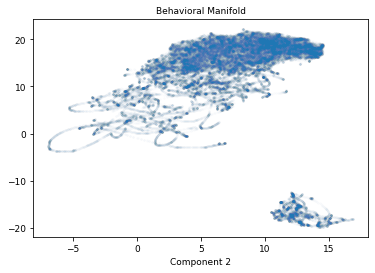

In [188]:
# create figures
embed = np.load(f"{results_path}/embeddings.npy")

plt.scatter(embed[:,0], embed[:,1], alpha=0.01, s=3)  
plt.xlabel("Component 1"); plt.xlabel("Component 2"); plt.title("Behavioral Manifold")
plt.show()

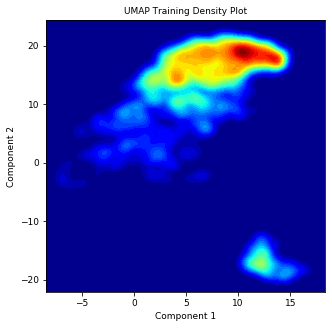

In [189]:
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.kdeplot(embed[:,0], embed[:,1], 
                 shade=True, shade_lowest=True, gridsize=100, levels=40, cmap='jet',cbar=False)
ax.set(xlabel='Component 1', ylabel='Component 2', title="UMAP Training Density Plot")
# ax.grid(True)
plt.show()

In [14]:
embed.shape

(5, 2)

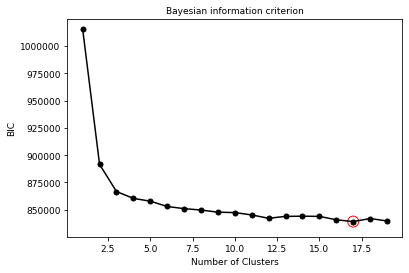

In [313]:
max_cluster = 20
cluster_list = range(1, max_cluster)
bic_list = []
for i in tqdm(cluster_list):
    gmm = GaussianMixture(n_components=i)
    gmm.fit(embed)
    bic_list.append(gmm.bic(embed))
    
min_idx = np.argmin(bic_list)
# plot
plt.plot(cluster_list, bic_list, marker="o", c='k', markersize=5)
plt.scatter(min_idx+1, bic_list[min_idx], s=120, edgecolors='r', facecolors='none')
plt.xlabel("Number of Clusters"); plt.ylabel("BIC"); plt.title("Bayesian information criterion")
plt.show()

In [317]:
# Gaussian Mixture Model
gmm = GaussianMixture(n_components=12, max_iter=500)
gmm_label = gmm.fit_predict(embed)

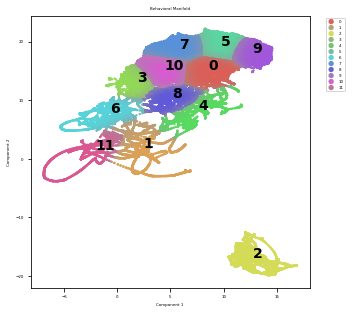

In [318]:
num_clusters = np.max(gmm_label) + 1
# compute probability
prob = np.max(gmm.predict_proba(embed), axis=1)

# choose color palette
color_palette = sns.color_palette('hls', num_clusters)
cluster_colors = [color_palette[x] for x in gmm_label]
cluster_member_colors = np.array([sns.desaturate(x, p) for x, p in zip(cluster_colors, prob)])

# create figures
plt.subplots(figsize=(5, 5))
for i in range(num_clusters):
    idx = (gmm_label==i)
    plt.scatter(embed[idx,0], embed[idx,1], 
                c=cluster_member_colors[idx], 
                alpha=1, s=2, label=i)
    plt.annotate(i, gmm.means_[i], fontsize=14, fontweight='bold')
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=3)
plt.xlabel("Component 1"); plt.ylabel("Component 2"); plt.title("Behavioral Manifold")
plt.show()

0


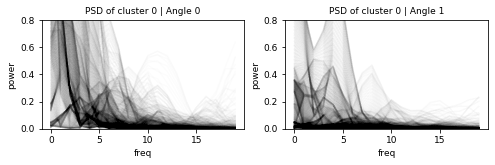

1


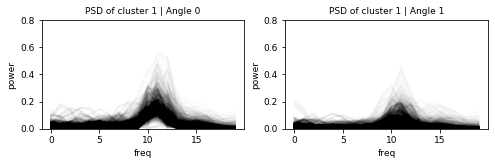

2


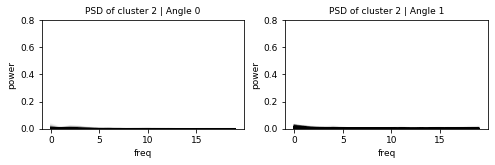

3


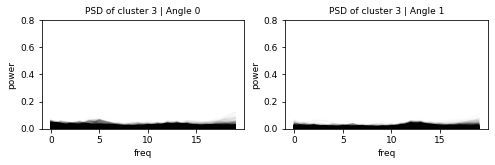

4


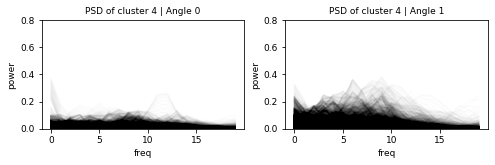

5


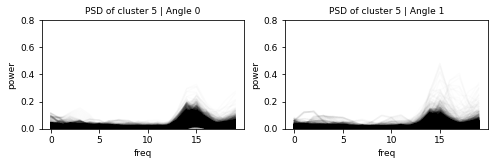

6


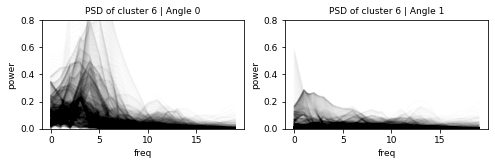

7


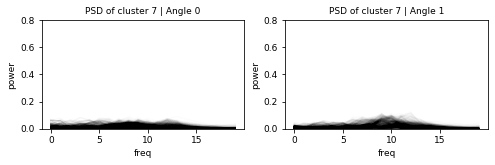

8


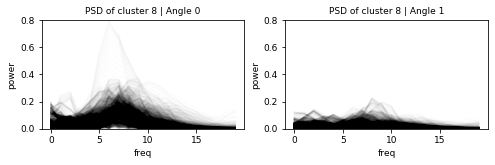

9


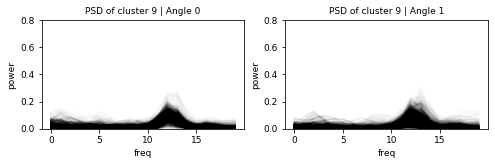

10


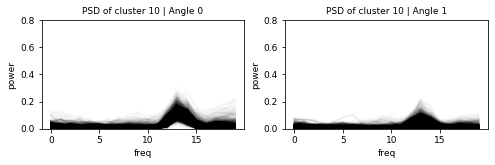

11


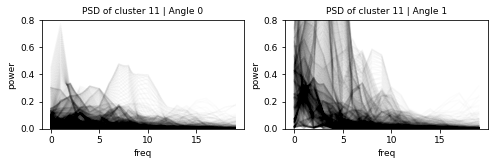

In [311]:
SMALL_SIZE = 9
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

num_angles, num_freq, num_fr = tot_pwr.shape

for i_cluster in range(num_clusters):
    print(i_cluster)
    idx_cluster = (gmm_label == i_cluster) & (prob>0.85)
    # plot
    fig, ax = plt.subplots(1,2,figsize=(8,2))
    for i_angle in range(num_angles):
        ax[i_angle].plot(tot_pwr[i_angle,:,idx_cluster].T, alpha=0.01, c='k')
        ax[i_angle].set_xlabel("freq"); ax[i_angle].set_ylabel("power"); ax[i_angle].set_title(f"PSD of cluster {i_cluster} | Angle {i_angle}")
        ax[i_angle].set_ylim([0,0.8])
    plt.show()

# Confirm Video

In [34]:
print(gmm_label.shape)
print(tot_angles.shape)
print(tot_pwr.shape)
print(tot_bp.shape)

(76468,)
(76468, 2)
(2, 20, 76468)
(76468, 30, 2)


In [323]:
cluster = 11
cluster_idx = np.where(gmm_label==cluster)[0]

In [324]:
cluster_idx.tolist()

[3864,
 3865,
 3866,
 3867,
 3868,
 3869,
 3870,
 3871,
 3872,
 3873,
 3874,
 3875,
 3876,
 3877,
 3878,
 3879,
 3880,
 3881,
 3882,
 3883,
 3884,
 3885,
 3886,
 3887,
 3888,
 3889,
 3890,
 3891,
 3892,
 3893,
 3894,
 3895,
 3896,
 3897,
 3898,
 3899,
 3900,
 3901,
 3902,
 3903,
 3904,
 3905,
 3906,
 3907,
 3908,
 3909,
 3910,
 3911,
 3912,
 3913,
 3914,
 3915,
 3916,
 3917,
 3918,
 3919,
 3920,
 3921,
 3922,
 3923,
 3924,
 3925,
 3926,
 3927,
 3928,
 3929,
 3930,
 3931,
 3932,
 3933,
 3934,
 3935,
 3936,
 3937,
 3938,
 3939,
 3940,
 3941,
 3942,
 3943,
 3944,
 3945,
 3946,
 3947,
 3948,
 3949,
 3950,
 3951,
 3952,
 3953,
 3954,
 3955,
 3956,
 3957,
 3958,
 3959,
 3960,
 3961,
 3962,
 3963,
 3964,
 3965,
 3966,
 3967,
 3968,
 3969,
 3970,
 3971,
 3972,
 3973,
 3974,
 3975,
 3976,
 3977,
 3978,
 3979,
 3980,
 3981,
 3982,
 3983,
 3984,
 3985,
 3986,
 3987,
 3988,
 3989,
 3990,
 3991,
 3992,
 3993,
 3994,
 3995,
 3996,
 3997,
 3998,
 3999,
 4000,
 4001,
 4002,
 4003,
 4004,
 4005,
 4006,

In [325]:
import matplotlib.animation as animation
from scipy.stats import norm

SMALL_SIZE = 4
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

# frame info
analyze_cluster = 11
frame = 22483 # 23197, 19294
start_pad, stop_pad = 50, 50
start = frame-start_pad
stop = frame+stop_pad

# video info
FFMpegWriter = animation.writers['ffmpeg']
writer = FFMpegWriter(fps=2)
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(16, 24)
ax1 = fig.add_subplot(gs[0:8, 0:8])
ax2 = fig.add_subplot(gs[0:4, 8:])
ax3 = fig.add_subplot(gs[4:8, 8:])
ax4 = fig.add_subplot(gs[8:, 0:8])
ax5 = fig.add_subplot(gs[8:, 8:16])
ax6 = fig.add_subplot(gs[8:, 16:24])

# ethogram plot
num_clusters = np.max(gmm_label)+1

# density cluster plot
sns.kdeplot(embed[:,0], embed[:,1], shade=True, shade_lowest=True, 
            gridsize=100, levels=40, cmap='viridis',cbar=False, ax=ax6)
for clust_i in range(num_clusters):
    ax6.annotate(clust_i, gmm.means_[clust_i], fontsize=4, fontweight='bold', color='k')
ax6.set(xlabel='Component 1', ylabel='Component 2') #, title="UMAP Training Density Plot"

# scatter cluster plot
samp_frac = 0.5
num_fr, _ = embed.shape
idx = random.sample(range(num_fr), int(samp_frac*num_fr))

with writer.saving(fig, f"./videos/test2/cluster{analyze_cluster}_frame{frame}.mp4", dpi=200):
    for fr_i, fr in enumerate(tqdm(np.arange(start, stop))):
        # ant plot
        ax1.clear()
        ax1.set_xlim([-4,4]); ax1.set_ylim([-5,5]);
        for shadow_i in range(-10,1):
            if shadow_i == 0:
                alpha=0.8
            else:
                alpha = 0.1
            ax1.plot(tot_bp[fr+shadow_i,0:4,0], tot_bp[fr+shadow_i,0:4,1], 
                     c='k', alpha=alpha, 
                     marker="o", markersize=3)
            ax1.plot(tot_bp[fr+shadow_i,8:11,0], tot_bp[fr+shadow_i,8:11,1], 
                     c='tab:blue', alpha=alpha, 
                     marker="o", markersize=3)
            ax1.plot(tot_bp[fr+shadow_i,21:24,0], tot_bp[fr+shadow_i,21:24,1], 
                     c='tab:orange', alpha=alpha,
                     marker="o", markersize=3)
        
        # angle plot
        ax2.clear()
        ax2.set_xlim([start,stop-1]); ax2.set_ylim([-1.0,1.0]);
        for i in range(2):
            ax2.plot(np.arange(start, fr+1), tot_angles[start:fr+1,i], alpha=0.5, linewidth=1, label=f"ang {i}")
        ax2.legend()
        ax2.set(xlabel='Frame', ylabel='Normalized Angle')
        
        # ethogram plot
        ax3.clear()
        ax3.set_xlim([start,stop-1]); ax3.set_ylim([-0.5,num_clusters]);
        ax3.scatter(np.arange(start, fr+1), gmm_label[start:fr+1], c=cluster_member_colors[start:fr+1], 
                    alpha=1, s=2, marker="s")
        ax3.set_yticks(range(0,num_clusters))
        ax3.set(xlabel='Frame', ylabel='Ethogram')
        
        # power spectrogram plot
        ax4.clear()
        for i in range(2):
            ax4.plot(freq, tot_pwr[i,:,fr].T, label=f"ang {i}", alpha=0.5, linewidth=1)
        ax4.set_xlabel("freq"); ax4.set_ylabel("power")
        ax4.set_ylim([-0.05,0.8])
        ax4.legend()
        
        # scatter cluster plot
        ax5.clear()
        ax5.scatter(embed[idx,0], embed[idx,1], 
                c=cluster_member_colors[idx], 
                alpha=0.2, s=0.1)
        ax5.plot(embed[start:fr+1,0], embed[start:fr+1,1],
                c='k', linewidth=1, alpha=0.5)
        ax5.scatter(embed[fr,0], embed[fr,1],
                c='k', s=5, marker="x")
        ax5.set(xlabel='Component 1', ylabel='Component 2', title=f"frame {fr}", xlim=ax6.get_xlim(), ylim=ax6.get_ylim())
        
        # take snapshot
        writer.grab_frame()
    writer.grab_frame()
    plt.close()

# Analyze by files

In [192]:
print(embed.shape)
print(gmm_label.shape)
print(tot_angles.shape)
print(tot_pwr.shape)
print(tot_bp.shape)

(76526, 2)
(76526,)
(76526, 2)
(2, 20, 76526)
(76526, 30, 2)


In [195]:
caste_data = {"min": [], "mid": [], "maj":[]}
env_data = {"trail": [], "food": [], "free":[], "groom":[]}
for key, fr_range in files_ref.items():
    if key.find("min_") is not -1:
        caste_data["min"].extend(range(fr_range[0], fr_range[1]))
    if key.find("mid_") is not -1:
        caste_data["mid"].extend(range(fr_range[0], fr_range[1]))
    if key.find("maj_") is not -1:
        caste_data["maj"].extend(range(fr_range[0], fr_range[1]))
    
    if key.find("trail") is not -1:
        env_data["trail"].extend(range(fr_range[0], fr_range[1]))
    if key.find("food") is not -1:
        env_data["food"].extend(range(fr_range[0], fr_range[1]))
    if key.find("free") is not -1:
        env_data["free"].extend(range(fr_range[0], fr_range[1]))
    if key.find("groom") is not -1:
        env_data["groom"].extend(range(fr_range[0], fr_range[1]))

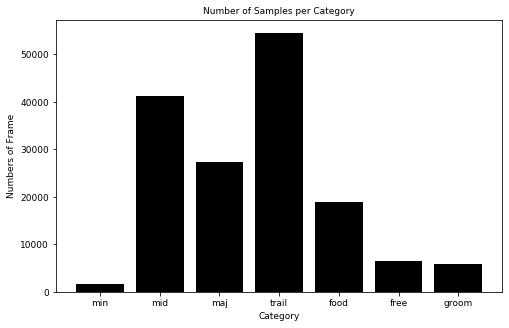

In [309]:
data_type = []
type_num_fr = []

fig, ax = plt.subplots(figsize=(8, 5), sharex=True, sharey=True)
for key, val in caste_data.items():
    data_type.append(key)
    type_num_fr.append(len(val))
for key, val in env_data.items():
    data_type.append(key)
    type_num_fr.append(len(val))
    
ax.bar(data_type, type_num_fr, color='k')
ax.set(xlabel='Category', ylabel='Numbers of Frame', title="Number of Samples per Category")
plt.show()

min
mid
maj


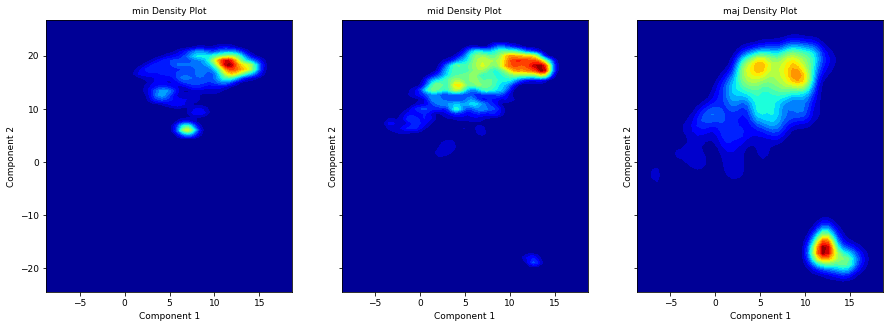

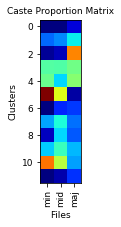

trail
food
free
groom


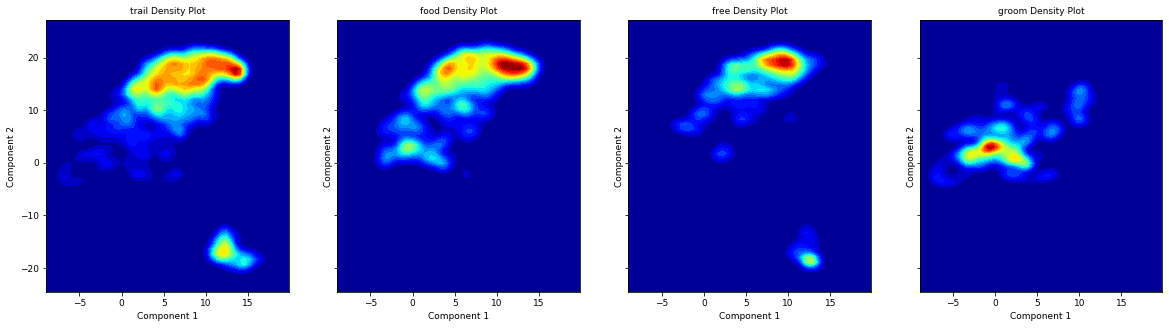

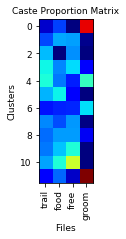

In [306]:
# CASTE
caste_proportion_matrix = np.zeros((3, num_cluster))
caste_row_name=[]

fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
for idx, (key, fr_idx) in enumerate(caste_data.items()):
    print(key)
    # density
    sns.kdeplot(embed[fr_idx,0], embed[fr_idx,1], ax=ax[idx], shade=True,
                      gridsize=50, levels=25, cmap='jet',cbar=False)
    ax[idx].set(xlabel='Component 1', ylabel='Component 2', 
                title=f"{key} Density Plot", facecolor='#000096')
    # proportion
    caste_row_name.append(key)
    cluster = gmm_label[fr_idx]
    for clust_i in range(num_cluster):
        caste_proportion_matrix[idx, clust_i] = len(np.where(cluster == clust_i)[0])/len(cluster)
plt.show()

fig, ax = plt.subplots(figsize=(8,3))       
ax.imshow(caste_proportion_matrix.T, cmap="jet")
plt.xticks(np.arange(3), caste_row_name, rotation=90)
ax.set(ylabel='Clusters', xlabel='Files', 
                title=f"Caste Proportion Matrix")
plt.show()

# ENVIRONMENT
env_proportion_matrix = np.zeros((4, num_cluster))
env_row_name=[]

fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)
for idx, (key, fr_idx) in enumerate(env_data.items()):
    print(key)
    # density
    sns.kdeplot(embed[fr_idx,0], embed[fr_idx,1], ax=ax[idx] , shade=True,
                      gridsize=50, levels=25, cmap='jet',cbar=False)
    ax[idx].set(xlabel='Component 1', ylabel='Component 2', 
                title=f"{key} Density Plot", facecolor='#000096')
    # proportion
    env_row_name.append(key)
    cluster = gmm_label[fr_idx]
    for clust_i in range(num_cluster):
        env_proportion_matrix[idx, clust_i] = len(np.where(cluster == clust_i)[0])/len(cluster)
plt.show()

fig, ax = plt.subplots(figsize=(8,3))       
ax.imshow(env_proportion_matrix.T, cmap="jet")
plt.xticks(np.arange(4), env_row_name, rotation=90)
ax.set(ylabel='Clusters', xlabel='Files', 
                title=f"Caste Proportion Matrix")
plt.show()

min
mid
maj


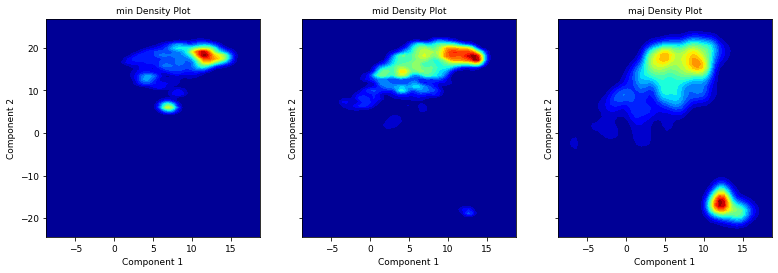

In [285]:
fig, ax = plt.subplots(1, 3, figsize=(13, 4), sharex=True, sharey=True)
for idx, (key, fr_idx) in enumerate(caste_data.items()):
    print(key)
    # density
    sns.kdeplot(embed[fr_idx,0], embed[fr_idx,1], ax=ax[idx], shade=True,
                      gridsize=50, levels=25, cmap='jet',cbar=False)
    ax[idx].set(xlabel='Component 1', ylabel='Component 2', 
                title=f"{key} Density Plot", facecolor='#000096')
    # proportion
    caste_row_name.append(key)
    cluster = gmm_label[fr_idx]
    for clust_i in range(num_cluster):
        caste_proportion_matrix[idx, clust_i] = len(np.where(cluster == clust_i)[0])/len(cluster)
plt.show()

In [359]:
%matplotlib qt

SMALL_SIZE = 7
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

num_cluster = np.max(gmm_label)+1
num_files = len(files_ref)

proportion_matrix = np.zeros((len(files_ref), num_cluster))
row_name = []

for files_idx, (path, fr_range) in enumerate(files_ref.items()):
    base = os.path.basename(path)
    basename = base.split("DeepCut")[0]
    row_name.append(basename)
    cluster = gmm_label[fr_range[0]:fr_range[1]]
    
    for clust_i in range(num_cluster):
        proportion_matrix[files_idx, clust_i] = len(np.where(cluster == clust_i)[0])/len(cluster)

fig, ax = plt.subplots(figsize=(20,5)) 
ax.imshow(proportion_matrix.T, cmap="jet")
plt.xticks(np.arange(num_files), row_name, rotation=45)
ax.set(ylabel='Clusters', xlabel='Files', 
                title=f"Proportion Matrix")
plt.tight_layout(pad=0)
plt.show()

In [342]:
?ax.imshow

In [357]:
row_name_mod = ["_".join(row.split("_")[0:-1]) for row in row_name]

In [358]:
row_name_mod

['mid_20181029_dW_trail2',
 'mid_20181005_PP_trail1',
 '20181101_XX_trail2_side_walk',
 'maj_20181005_dP_food1',
 'mid_20181029_dL_food1',
 '20181101_XX_trail2_10386-11100',
 'mid_20181005_PP_trail1',
 'min_20181029_PP_trail1',
 'mid_20181018_ant5_food2',
 'mid_20181025_dY_trail1',
 'mid_20181005_PP_food2',
 'mid_20181029_ant3_trail1',
 'mid_20181029_dL_food1',
 'maj_20181005_dP_food1',
 'min_20181029_PP_trail1',
 'mid_20181029_dL_free',
 'mid_20181029_dW_trail2',
 'maj_20181101_XX_trail2',
 'mid_20181029_dW_trail1',
 'maj_20181005_dP_free',
 'mid_20181029_dL_free',
 'mid_20181019_ant1_free',
 'maj_20181005_dP_free',
 'mid_20181029_dL_food1',
 'maj_20181101_XX_trail2',
 'mid_20181005_PP_trail1',
 'maj_20181005_dP_food1',
 'mid_20181029_dL_food1',
 'mid_20181029_ant3_trail1',
 'mid_20181005_PP_trail1',
 'mid_20181019_ant1_free',
 'mid_20181018_ant5_food2',
 'mid_20181018_ant1_food2',
 'mid_20181005_PP_trail1',
 'mid_20181019_ant1_free',
 'maj_20181005_dP_food1',
 'mid_20181029_dL_food1'